# Introduction to Data Science and AI, Sofia, 2023

# Assignment 1: Introduction to Data Science and Python

*Submission by Dragomir Proychev*

*Time spent working on the assignment: 3 hours*

***

*__Download some data related to GDP per capita and life expectancy.__*

*__a. Write a Python program that draws a scatter plot of GDP per capita vs life
expectancy. State any assumptions and motivate decisions that you make
when selecting data to be plotted, and in combining data.__*

***

Let's kick things off by downloading the required data from https://ourworldindata.org/.

Once we've downloaded the data, we can import it into our Python program and print the data frames to get a general idea of the data we are dealing with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_gdp_capita = pd.read_csv('data/gdp-per-capita.csv')
df_life = pd.read_csv('data/life-expectancy.csv')

print(df_gdp_capita)
print(df_life)

           Entity Code  Year  GDP per capita
0     Afghanistan  AFG  2002       1280.4631
1     Afghanistan  AFG  2003       1292.3335
2     Afghanistan  AFG  2004       1260.0605
3     Afghanistan  AFG  2005       1352.3207
4     Afghanistan  AFG  2006       1366.9932
...           ...  ...   ...             ...
6341     Zimbabwe  ZWE  2017       2331.7808
6342     Zimbabwe  ZWE  2018       2399.6216
6343     Zimbabwe  ZWE  2019       2203.3967
6344     Zimbabwe  ZWE  2020       1990.3195
6345     Zimbabwe  ZWE  2021       2115.1445

[6346 rows x 4 columns]
            Entity Code  Year  Life expectancy
0      Afghanistan  AFG  1950          27.7275
1      Afghanistan  AFG  1951          27.9634
2      Afghanistan  AFG  1952          28.4456
3      Afghanistan  AFG  1953          28.9304
4      Afghanistan  AFG  1954          29.2258
...            ...  ...   ...              ...
20750     Zimbabwe  ZWE  2017          60.7095
20751     Zimbabwe  ZWE  2018          61.4141
20752     Zi

It seems like both datasets contain historical data throughout the years. For the task at hand the most recent data for every country should suffice.

A closer look at the datasets reveals that there is data for entire continents as well. We can filter it out by removing the rows with an empty `Code`. There also seems to be data present for the entire world as a whole, which we can filter out as well.

Let's quickly clean our data and draw a box plot for each dataset.


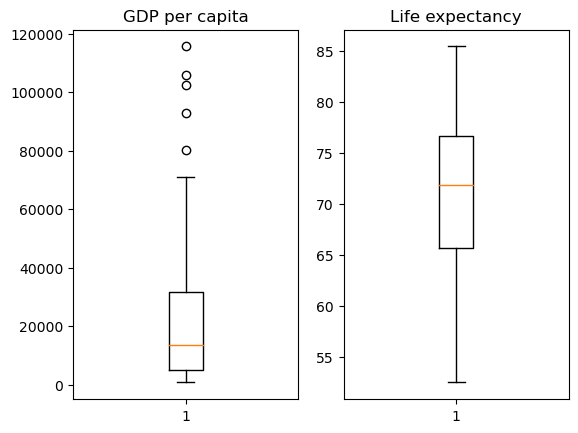

In [2]:
most_recent_year = min(max(df_gdp_capita['Year']), max(df_life['Year']))

df_gdp_capita_recent = df_gdp_capita[df_gdp_capita['Year'] == most_recent_year]
df_life_recent = df_life[df_life['Year'] == most_recent_year]

countries = np.intersect1d(
    df_gdp_capita_recent['Code'].where(lambda c : c != 'OWID_WRL').dropna(),
    df_life_recent['Code'].where(lambda c : c != 'OWID_WRL').dropna()
)

df_gdp_capita_countries = df_gdp_capita_recent[df_gdp_capita_recent['Code'].isin(countries)]
df_life_countries = df_life_recent[df_life_recent['Code'].isin(countries)]

fig, axs = plt.subplots(1, 2)

axs[0].boxplot(df_gdp_capita_countries['GDP per capita'])
axs[0].set_title('GDP per capita')

axs[1].boxplot(df_life_countries['Life expectancy'])
axs[1].set_title('Life expectancy')

plt.show()

It's easy to see that there are some significant outliers in the GDP per capita dataset. The life expectancy data is more evenly distributed. Let's try merging the two data sets and drawing a scatter plot.

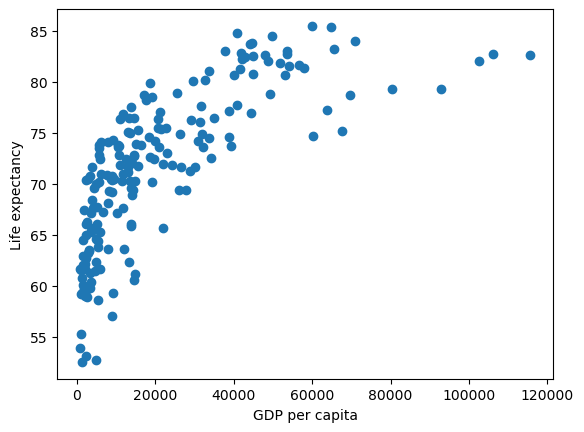

In [3]:
df_combined = pd.merge(
    left = df_gdp_capita_countries.sort_values(['Code']),
    right = df_life_countries.sort_values(['Code'])
)

plt.scatter(
    df_combined['GDP per capita'],
    df_combined['Life expectancy'],
)

plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')

plt.show()

Because of the outliers in the GDP per capita dataset, the scatter plot makes it harder to conclude whether there is a clear correlation between the two metrics. We can either remove the outliers, or use a logarithmic scale for the GDP per capita metric. Let's do the latter.

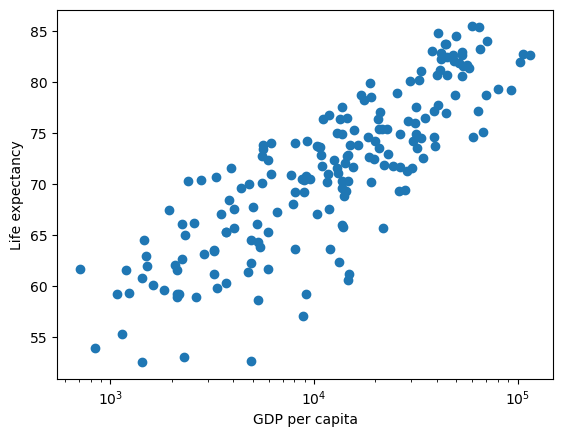

In [4]:
plt.scatter(
    df_combined['GDP per capita'],
    df_combined['Life expectancy'],
)

plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')

plt.xscale('log')

plt.show()

Much better. We can easily see the correlation between life expectancy and GDP per capita now.

***

*__b. Which countries have a life expectancy higher than one standard deviation
above the mean?__*

***

For this task we can use the combined dataset that we prepared in the previous task.

In [5]:
gdp_mean = np.mean(df_combined['GDP per capita'])
gdp_std = np.std(df_combined['GDP per capita'])

print(df_combined[df_combined['GDP per capita'] > (gdp_mean + gdp_std)])

                   Entity Code  Year  GDP per capita  Life expectancy
4    United Arab Emirates  ARE  2021       69733.800          78.7104
8               Australia  AUS  2021       49774.340          84.5265
9                 Austria  AUT  2021       54121.145          81.5797
12                Belgium  BEL  2021       51739.540          81.8787
17                Bahrain  BHR  2021       49387.418          78.7605
22                Bermuda  BMU  2021       80271.130          79.2801
26                 Brunei  BRN  2021       60127.023          74.6424
30                 Canada  CAN  2021       47892.945          82.6565
31            Switzerland  CHE  2021       71032.840          83.9872
43         Cayman Islands  CYM  2021       67500.100          75.1267
46                Germany  DEU  2021       53179.656          80.6301
49                Denmark  DNK  2021       57962.652          81.3753
57                Finland  FIN  2021       48753.355          82.0381
59                 F

***

*__c. Which countries have high life expectancy but have low GDP? Motivate how
you have chosen to define “high” and “low”.__*

***

For the purposes of this task we'll need to import some data related to GDP first.

In [6]:
df_gdp = pd.read_csv('data/gdp.csv')

print(df_gdp)

           Entity Code  Year          GDP
0     Afghanistan  AFG  2002  26890054000
1     Afghanistan  AFG  2003  29265058000
2     Afghanistan  AFG  2004  29678901000
3     Afghanistan  AFG  2005  33011757000
4     Afghanistan  AFG  2006  34780330000
...           ...  ...   ...          ...
6341     Zimbabwe  ZWE  2017  34396336000
6342     Zimbabwe  ZWE  2018  36119544000
6343     Zimbabwe  ZWE  2019  33832294000
6344     Zimbabwe  ZWE  2020  31187640000
6345     Zimbabwe  ZWE  2021  33828616000

[6346 rows x 4 columns]


Let's clean the data in a similar manner to what we did with the other datasets and draw a box plot.

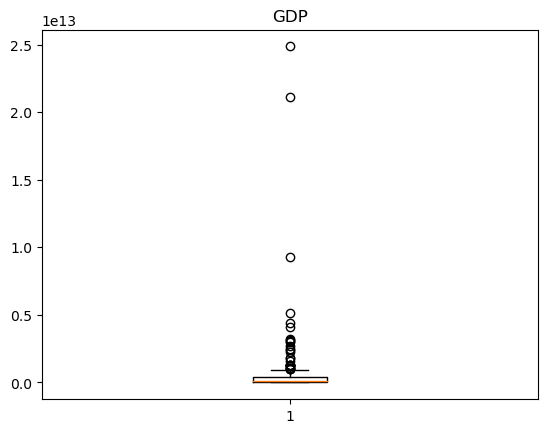

In [7]:
df_gdp_recent = df_gdp[df_gdp['Year'] == most_recent_year]
df_gdp_countries = df_gdp_recent[df_gdp_recent['Code'].isin(countries)]

plt.boxplot(df_gdp_countries['GDP'])
plt.title('GDP')

plt.show()

It seems like GDP has some very significant outliers. Let's use a logarithmic scale to better visualize our data instead.

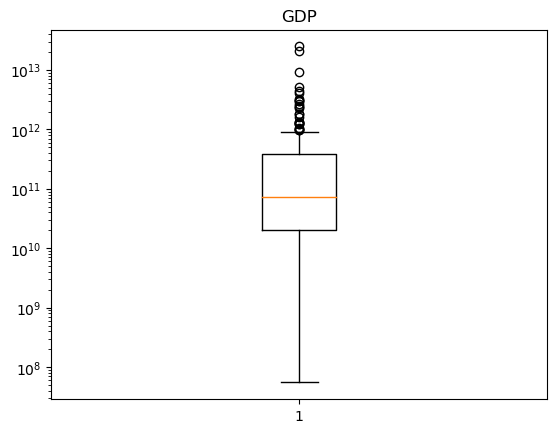

In [8]:
plt.boxplot(df_gdp_countries['GDP'])
plt.yscale('log')
plt.title('GDP')

plt.show()

Let's merge the data into our existing dataframe.

In [9]:
df_combined = pd.merge(
    left = df_combined,
    right = df_gdp_countries.sort_values(['Code'])
)

Now that we've prepared our data, let's return to the problem at hand.

Since the life expectancy data is evenly distributed, we can define 'high life expectancy' as life expectancy which is above the 75 percentile.

The GDP data on the other hand is unevenly distributed with some very significant outliers. There is a large cluster of countries with significantly lower GDP when compared to the most developed countries. It might make the most sense to define 'low GDP' as GDP which is below the median.

In [10]:
life_high = np.percentile(df_combined['Life expectancy'], 75)
gdp_low = np.median(df_combined['GDP'])

print(df_combined.loc[df_combined['Life expectancy'] > life_high].loc[df_combined['GDP'] < gdp_low])

                  Entity      Code  Year  GDP per capita  Life expectancy  \
7    Antigua and Barbuda       ATG  2021       19124.430          78.4968   
17               Bahrain       BHR  2021       49387.418          78.7605   
22               Bermuda       BMU  2021       80271.130          79.2801   
25              Barbados       BRB  2021       13754.803          77.5714   
44                Cyprus       CYP  2021       41701.703          81.2033   
55               Estonia       EST  2021       38717.695          77.1436   
83               Iceland       ISL  2021       53586.156          82.6782   
106                Macao       MAC  2021       64796.996          85.3994   
110             Maldives       MDV  2021       18765.217          79.9182   
115                Malta       MLT  2021       44658.720          83.7769   
134               Kosovo  OWID_KOS  2021       11884.180          76.8062   

             GDP  
7     1782760200  
17   72266880000  
22    5126676500  

***

*__d. Does every strong economy (normally indicated by GDP) have high life
expectancy?__*

***

In order to answer this question, we'll first have to determine whether there are any countries with strong economies which do not have high life expectancy (meaning that they have low or average life expectancy instead).

Let's define 'low or average life expectancy' as life expectancy which is below the 75 percentile. 

Since GDP is not evenly distributed, it might be most appropriate to define a 'strong economy' as an economy with GDP above the mean.

In [11]:
gdp_high = np.mean(df_combined['GDP'])

print(df_combined.loc[df_combined['Life expectancy'] < life_high].loc[df_combined['GDP'] > gdp_high])

           Entity Code  Year  GDP per capita  Life expectancy            GDP
5       Argentina  ARG  2021      21527.1950          75.3899   986133900000
15     Bangladesh  BGD  2021       5911.0130          72.3811  1001067000000
24         Brazil  BRA  2021      14592.3530          72.7504  3127524000000
38       Colombia  COL  2021      14648.5920          72.8296   754645140000
53          Egypt  EGY  2021      11566.0500          70.2207  1263731700000
78      Indonesia  IDN  2021      11858.1460          67.5703  3246205400000
79          India  IND  2021       6592.0420          67.2398  9278720000000
81           Iran  IRN  2021      15004.6875          73.8749  1319263700000
111        Mexico  MEX  2021      19086.1050          70.2127  2418307500000
123      Malaysia  MYS  2021      26333.1560          74.8839   884106100000
126       Nigeria  NGA  2021       4922.6323          52.6760  1050496300000
135      Pakistan  PAK  2021       5232.1426          66.0979  1210729000000

To answer the question at hand, based on our definitions of 'strong economy' and 'high life expectancy' not every country with a strong economy has high life expectancy.

***

*__e. Related to question d, what would happen if you use GDP per capita as an
indicator of strong economy? Explain the results you obtained, and discuss
any insights you get from comparing the results of d and e.__*

***

Similar to what we did in the previous task, let's try using GDP per capita as an indicator of a strong economy.

Since GDP is not evenly distributed as well, let's define 'high GDP per capita' as GDP per capita which is above the mean.

In [12]:
gdp_capita_high = np.mean(df_combined['GDP per capita'])

print(
    df_combined
        .loc[df_combined['Life expectancy'] < life_high]
        .loc[df_combined['GDP per capita'] > gdp_capita_high]
)

                    Entity Code  Year  GDP per capita  Life expectancy  \
0                    Aruba  ABW  2021       38866.332          74.6265   
5                Argentina  ARG  2021       21527.195          75.3899   
16                Bulgaria  BGR  2021       24398.130          71.7980   
18                 Bahamas  BHS  2021       30210.162          71.5983   
26                  Brunei  BRN  2021       60127.023          74.6424   
43          Cayman Islands  CYM  2021       67500.100          75.1267   
72                  Guyana  GUY  2021       21925.188          65.6734   
77                 Hungary  HUN  2021       33593.152          74.5301   
89              Kazakhstan  KAZ  2021       26110.530          69.3622   
94   Saint Kitts and Nevis  KNA  2021       26485.816          71.6822   
99                   Libya  LBY  2021       21965.174          71.9112   
103              Lithuania  LTU  2021       39305.613          73.7201   
105                 Latvia  LVA  2021 

When comparing the results between task d. and task e. we can observe significantly different results.

It's likely that is due to differences in population. It's possible for a country with relatively low population to have lower GDP while maintaining higher GDP per capita. On the other hand it's also possible for a country with relatively high population to have higher GDP while maintaing lower GDP per capita.

Which of the two metrics is better as an indicator for strong economy depends on the task at hand. For example:
- If we want to measure the overall economic size and production capacity of a country, GDP would be a better metric
- If we want to measure the standard of living in a country, GDP per capita would be a better metric